In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [51]:
# load data
def load_digit(file_name: str):
    digit = np.loadtxt(file_name, delimiter=',')
    return digit.reshape(-1, 28, 28)


# 1. In this problem, we will apply machine learning models to classify hand-written digits.

In [52]:
digit_5 = load_digit('digit_5.csv')
digit_6 = load_digit('digit_6.csv')

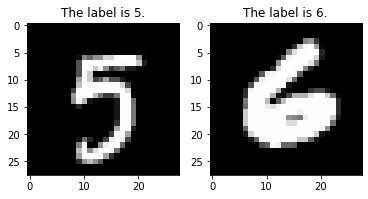

In [53]:
# visualize image
fig, axes = plt.subplots(1, 2)
axes[0].set_title("The label is 5.")
axes[0].imshow(digit_5[1], cmap='gray')
axes[1].set_title("The label is 6.")
axes[1].imshow(digit_6[1], cmap='gray')
fig.savefig("fig.png", dpi=300)

In [54]:
np.concatenate((digit_5, digit_6)).shape

(10404, 28, 28)

In [55]:
data = np.concatenate((digit_5, digit_6))
label = np.concatenate((
    np.zeros(len(digit_5)), np.ones(len(digit_6))
))
n_samples = len(data)
data_reshape = data.reshape((n_samples, -1))

In [56]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data_reshape, label, random_state=2021)
print(train_X.shape)
print(train_y.shape)

(7803, 784)
(7803,)


## SVM for Classifying Digits

In [57]:
# import necessary pakages in this cell
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Cross Validataion of Margin Parameters for Linear SVM

In [58]:
tuned_parameters = [
    {"loss": ["hinge"], "C": [0.001, 0.01, 0.1, 1, 10, 100]}
]

accuracy = ["accuracy"]
for score in accuracy:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring="%s" % score)
    clf.fit(train_X, train_y)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = test_y, clf.predict(test_X)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for accuracy



/Users/ShivramIyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ShivramIyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ShivramIyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ShivramIyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ShivramIyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: L

Best parameters set found on development set:

{'C': 0.1, 'loss': 'hinge'}

Grid scores on development set:

0.971 (+/-0.004) for {'C': 0.001, 'loss': 'hinge'}
0.977 (+/-0.003) for {'C': 0.01, 'loss': 'hinge'}
0.978 (+/-0.003) for {'C': 0.1, 'loss': 'hinge'}
0.977 (+/-0.005) for {'C': 1, 'loss': 'hinge'}
0.969 (+/-0.003) for {'C': 10, 'loss': 'hinge'}
0.969 (+/-0.004) for {'C': 100, 'loss': 'hinge'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1254
         1.0       0.98      0.98      0.98      1347

    accuracy                           0.98      2601
   macro avg       0.98      0.98      0.98      2601
weighted avg       0.98      0.98      0.98      2601




#### Plot for each missclassification rate Linear SVM

Text(0.5, 1.0, 'Linear SVM Cross Validation Estimates of Misclassification Rate')

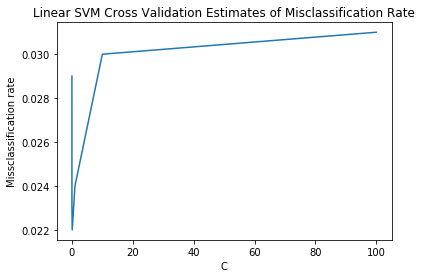

In [59]:
#Missclassification rates for the different margin parameters
mr_1 = 1-0.971
mr_2 = 1-0.977
mr_3 = 1-0.978
mr_4 = 1-0.976
mr_5 = 1-0.970
mr_6 = 1-0.969

#Axis values
x = [0.001, 0.01, 0.1, 1, 10, 100] # different C parameters
y = [mr_1, mr_2, mr_3, mr_4, mr_5, mr_6]

plt.plot(x, y)

plt.xlabel('C')
plt.ylabel('Missclassification rate')

plt.title('Linear SVM Cross Validation Estimates of Misclassification Rate')

### Cross Validataion of Margin Parameters for RBF kernel SVM

In [60]:

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": ["scale", "auto"], "C": [0.1, 1, 10, 100, 1000]}

]

accuracy = ["accuracy"]
for score in accuracy:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s" % score)
    clf.fit(train_X, train_y)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = test_y, clf.predict(test_X)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Grid scores on development set:

0.983 (+/-0.003) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.969 (+/-0.004) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.992 (+/-0.003) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.978 (+/-0.004) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.994 (+/-0.003) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.983 (+/-0.004) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.994 (+/-0.003) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.988 (+/-0.003) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.994 (+/-0.003) for {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
0.989 (+/-0.005) for {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f

#### Plot for each missclassification rate RBF SVM

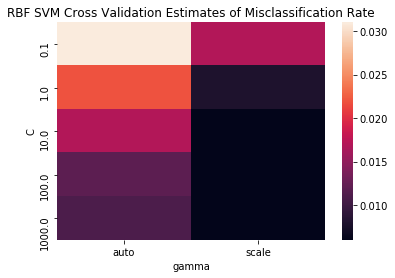

In [12]:
#Missclassification rates for the different margin and bandwith parameters
mr_1 = 1-0.983
mr_2 = 1-0.969
mr_3 = 1-0.992
mr_4 = 1-0.978
mr_5 = 1-0.994
mr_6 = 1-0.983
mr_7 = 1-0.994
mr_8 = 1-0.988
mr_9 = 1-0.994
mr_10 = 1-0.989

#Axis values
X = [0.1, 0.1, 1, 1, 10, 10, 100, 100, 1000, 1000] # different C values
Y = ['scale', 'auto', 'scale', 'auto', 'scale', 'auto', 'scale', 'auto', 'scale', 'auto'] # different gamma value
Z = [mr_1, mr_2, mr_3, mr_4, mr_5, mr_6, mr_7, mr_8, mr_9, mr_10]

data = pd.DataFrame({'C': X, 'gamma': Y, 'Misclassification Rate': Z})
data_pivoted = data.pivot ("C", "gamma", "Misclassification Rate")
ax = sns.heatmap(data_pivoted).set_title('RBF SVM Cross Validation Estimates of Misclassification Rate')


## Training and Linear and RBF SVM Models

In [13]:
# train SVM in this cell
linear_SVM = svm.LinearSVC(C = 0.1, loss = 'hinge').fit(train_X,train_y)
svclassifier_RBF = svm.SVC(C = 10, kernel = 'rbf', gamma = 'scale').fit(train_X, train_y)
print(linear_SVM)
print(svclassifier_RBF)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Evaluating Linear and RBF SVM Models

In [14]:
# Use trained SVM model on testing data
y_pred_linear = linear_SVM.predict(test_X)
y_pred_rbf = svclassifier_RBF.predict(test_X)

In [15]:
# evaluate accuracy on this cell
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y,y_pred_linear))
print(classification_report(test_y,y_pred_linear))
print(confusion_matrix(test_y,y_pred_rbf))
print(classification_report(test_y,y_pred_rbf))
accuracy_linear = accuracy_score(test_y,y_pred_linear)
accuracy_rbf = accuracy_score(test_y, y_pred_rbf)
missclassification_linear = 1-accuracy_linear
missclassification_rbf = 1-accuracy_rbf
print("Accuracy:")
print("     Linear SVM: {}".format(accuracy_linear))
print("     RBF SVM: {}".format(accuracy_rbf))
print("Missclassification rates:")
print("     Linear SVM: {}".format(missclassification_linear))
print("     RBF SVM: {}".format(missclassification_rbf))

[[1228   26]
 [  24 1323]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1254
         1.0       0.98      0.98      0.98      1347

    accuracy                           0.98      2601
   macro avg       0.98      0.98      0.98      2601
weighted avg       0.98      0.98      0.98      2601

[[1250    4]
 [   6 1341]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1254
         1.0       1.00      1.00      1.00      1347

    accuracy                           1.00      2601
   macro avg       1.00      1.00      1.00      2601
weighted avg       1.00      1.00      1.00      2601

Accuracy:
     Linear SVM: 0.9807766243752403
     RBF SVM: 0.9961553248750481
Missclassification rates:
     Linear SVM: 0.01922337562475973
     RBF SVM: 0.0038446751249519018


We should use a non-linear SVM since the misclassification rate of the SVM with RBF kernel is lower than that of the Linear SVM.

# Neural Network for Classifying Digits

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# reconstruct data shape
# Reload the data in its orignial format and split into test and train sets
def load_digit(file_name: str):
    digit = np.loadtxt(file_name, delimiter=',')
    return digit.reshape(-1, 28, 28)

digit_5 = load_digit('digit_5.csv')
digit_6 = load_digit('digit_6.csv')

data = np.concatenate((digit_5, digit_6))
label = np.concatenate((
    np.zeros(len(digit_5)), np.ones(len(digit_6))
))
n_samples = len(data)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data, label, random_state=2021)
print(train_X.shape)
print(train_y.shape)


train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_y = keras.utils.to_categorical(train_y, num_classes=2)
test_y = keras.utils.to_categorical(test_y, num_classes=2)

input_shape = (28, 28, 1)
num_classes = 2


(7803, 28, 28)
(7803,)


### Set Neuaral Network Model Structure

In [61]:
# define model structure
keras_model = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation = 'softmax')
    ]
)
keras_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

### Train Neural Network Model

In [23]:
# train model
batch_size = 128
epochs = 10

opt = keras.optimizers.Adam(learning_rate = 0.1)
keras_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = keras_model.fit(train_X, train_y, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/10
55/55 [==============================] - 5s 82ms/step - loss: 2.7721 - accuracy: 0.8315 - val_loss: 0.0716 - val_accuracy: 0.9757
Epoch 2/10
55/55 [==============================] - 4s 77ms/step - loss: 0.1038 - accuracy: 0.9650 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 3/10
55/55 [==============================] - 5s 82ms/step - loss: 0.0735 - accuracy: 0.9747 - val_loss: 0.0232 - val_accuracy: 0.9923
Epoch 4/10
55/55 [==============================] - 5s 85ms/step - loss: 0.0605 - accuracy: 0.9792 - val_loss: 0.0280 - val_accuracy: 0.9936
Epoch 5/10
55/55 [==============================] - 4s 76ms/step - loss: 0.0549 - accuracy: 0.9823 - val_loss: 0.0199 - val_accuracy: 0.9949
Epoch 6/10
55/55 [==============================] - 5s 98ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0291 - val_accuracy: 0.9923
Epoch 7/10
55/55 [==============================] - 5s 84ms/step - loss: 0.0512 - accuracy: 0.9833 - val_loss: 0.0218 - val_accuracy: 0.9949
Epoch 8/10
55

### Evanluate Neuaral Network Model

In [25]:
# evaluate the trained model
score = keras_model.evaluate(test_X, test_y, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Misclassification Rate", 1-score[1])

Test loss: 0.05868332087993622
Test accuracy: 0.9823144674301147
Misclassification Rate 0.017685532569885254


#### Learning Curve with respect to training loss



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


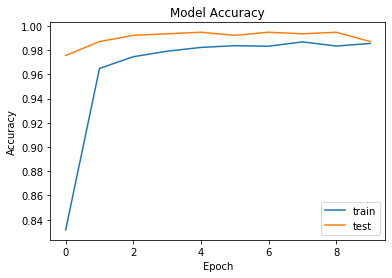

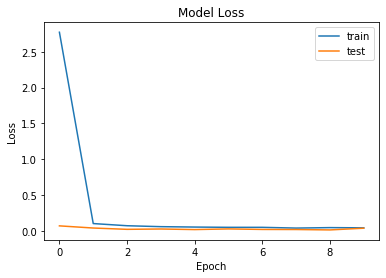

In [26]:
print("\n")
print(history.history.keys())

# Learning curve with respect to accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

# Learning Curve with respect to loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

### Evaluating Neural Network Model with Different Learning Rates

In [27]:
batch_size = 128
epochs = 10

opt = keras.optimizers.Adam(learning_rate = 0.01)
keras_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = keras_model.fit(train_X, train_y, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/10
55/55 [==============================] - 5s 83ms/step - loss: 0.0347 - accuracy: 0.9876 - val_loss: 0.0148 - val_accuracy: 0.9962
Epoch 2/10
55/55 [==============================] - 5s 82ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0143 - val_accuracy: 0.9962
Epoch 3/10
55/55 [==============================] - 4s 76ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0143 - val_accuracy: 0.9949
Epoch 4/10
55/55 [==============================] - 4s 76ms/step - loss: 0.0271 - accuracy: 0.9909 - val_loss: 0.0156 - val_accuracy: 0.9949
Epoch 5/10
55/55 [==============================] - 4s 73ms/step - loss: 0.0280 - accuracy: 0.9903 - val_loss: 0.0172 - val_accuracy: 0.9962
Epoch 6/10
55/55 [==============================] - 4s 75ms/step - loss: 0.0278 - accuracy: 0.9902 - val_loss: 0.0181 - val_accuracy: 0.9936
Epoch 7/10
55/55 [==============================] - 4s 70ms/step - loss: 0.0238 - accuracy: 0.9920 - val_loss: 0.0145 - val_accuracy: 0.9949
Epoch 8/10
55



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


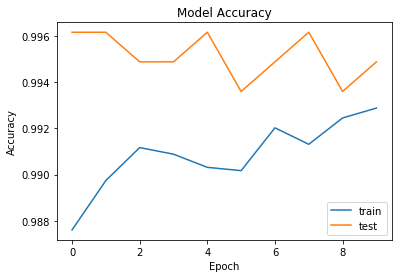

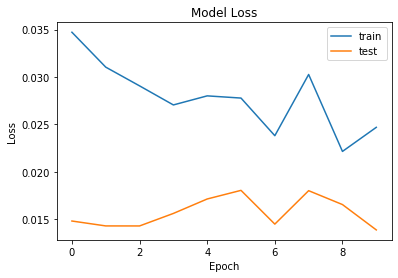

In [28]:
print("\n")
print(history.history.keys())

# Learning curve with respect to accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

# Learning Curve with respect to loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [29]:
batch_size = 128
epochs = 10

opt = keras.optimizers.Adam(learning_rate = 0.001)
keras_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = keras_model.fit(train_X, train_y, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/10
55/55 [==============================] - 5s 81ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0149 - val_accuracy: 0.9949
Epoch 2/10
55/55 [==============================] - 4s 76ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0155 - val_accuracy: 0.9949
Epoch 3/10
55/55 [==============================] - 4s 75ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0154 - val_accuracy: 0.9949
Epoch 4/10
55/55 [==============================] - 4s 75ms/step - loss: 0.0214 - accuracy: 0.9919 - val_loss: 0.0162 - val_accuracy: 0.9949
Epoch 5/10
55/55 [==============================] - 4s 75ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0160 - val_accuracy: 0.9949
Epoch 6/10
55/55 [==============================] - 4s 71ms/step - loss: 0.0195 - accuracy: 0.9932 - val_loss: 0.0156 - val_accuracy: 0.9949
Epoch 7/10
55/55 [==============================] - 4s 75ms/step - loss: 0.0219 - accuracy: 0.9919 - val_loss: 0.0161 - val_accuracy: 0.9949
Epoch 8/10
55



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


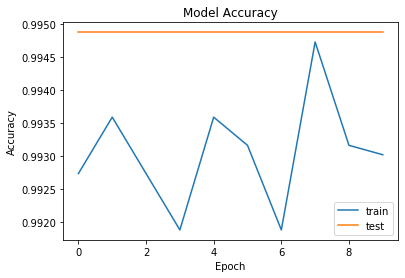

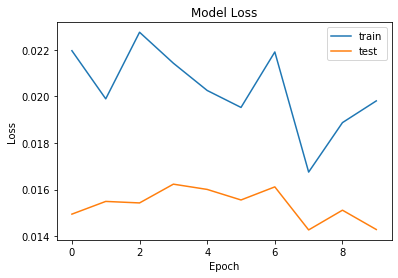

In [30]:
print("\n")
print(history.history.keys())

# Learning curve with respect to accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

# Learning Curve with respect to loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [31]:
batch_size = 128
epochs = 10

opt = keras.optimizers.Adam(learning_rate = 0.0001)
keras_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = keras_model.fit(train_X, train_y, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/10
55/55 [==============================] - 5s 75ms/step - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.0148 - val_accuracy: 0.9949
Epoch 2/10
55/55 [==============================] - 4s 68ms/step - loss: 0.0195 - accuracy: 0.9942 - val_loss: 0.0148 - val_accuracy: 0.9949
Epoch 3/10
55/55 [==============================] - 4s 70ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.0149 - val_accuracy: 0.9949
Epoch 4/10
55/55 [==============================] - 4s 72ms/step - loss: 0.0213 - accuracy: 0.9920 - val_loss: 0.0154 - val_accuracy: 0.9949
Epoch 5/10
55/55 [==============================] - 4s 69ms/step - loss: 0.0202 - accuracy: 0.9923 - val_loss: 0.0152 - val_accuracy: 0.9949
Epoch 6/10
55/55 [==============================] - 4s 73ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0152 - val_accuracy: 0.9949
Epoch 7/10
55/55 [==============================] - 4s 69ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0153 - val_accuracy: 0.9949
Epoch 8/10
55



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


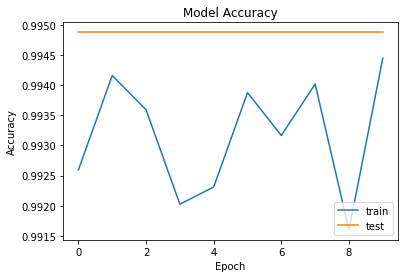

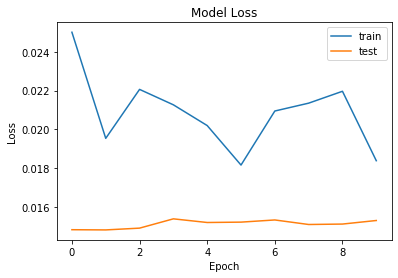

In [32]:
print("\n")
print(history.history.keys())

# Learning curve with respect to accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

# Learning Curve with respect to loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [33]:
batch_size = 128
epochs = 10

opt = keras.optimizers.Adam(learning_rate = 1)
keras_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = keras_model.fit(train_X, train_y, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/10
55/55 [==============================] - 5s 77ms/step - loss: 2.0634 - accuracy: 0.5221 - val_loss: 0.7204 - val_accuracy: 0.4545
Epoch 2/10
55/55 [==============================] - 4s 73ms/step - loss: 0.7107 - accuracy: 0.4956 - val_loss: 0.7165 - val_accuracy: 0.4545
Epoch 3/10
55/55 [==============================] - 4s 75ms/step - loss: 0.7034 - accuracy: 0.5087 - val_loss: 0.7339 - val_accuracy: 0.4545
Epoch 4/10
55/55 [==============================] - 4s 77ms/step - loss: 0.7087 - accuracy: 0.5036 - val_loss: 0.6893 - val_accuracy: 0.5455
Epoch 5/10
55/55 [==============================] - 4s 74ms/step - loss: 0.7066 - accuracy: 0.5087 - val_loss: 0.7373 - val_accuracy: 0.4545
Epoch 6/10
55/55 [==============================] - 4s 72ms/step - loss: 0.6979 - accuracy: 0.5064 - val_loss: 0.6981 - val_accuracy: 0.4545
Epoch 7/10
55/55 [==============================] - 4s 77ms/step - loss: 0.7076 - accuracy: 0.5044 - val_loss: 0.7032 - val_accuracy: 0.4545
Epoch 8/10
55



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


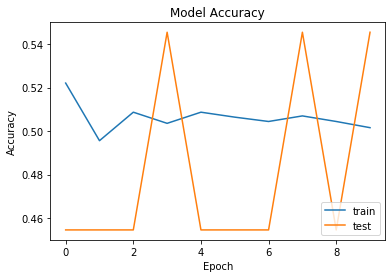

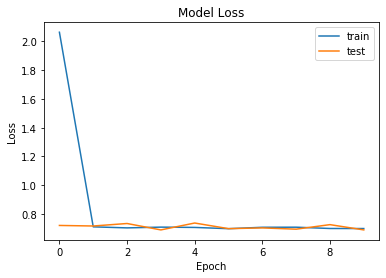

In [34]:
print("\n")
print(history.history.keys())

# Learning curve with respect to accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

# Learning Curve with respect to loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [35]:
batch_size = 128
epochs = 10

opt = keras.optimizers.Adam(learning_rate = 0.00001)
keras_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = keras_model.fit(train_X, train_y, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/10
55/55 [==============================] - 5s 77ms/step - loss: 0.6928 - accuracy: 0.5189 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 2/10
55/55 [==============================] - 4s 79ms/step - loss: 0.6928 - accuracy: 0.5189 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 3/10
55/55 [==============================] - 5s 82ms/step - loss: 0.6928 - accuracy: 0.5189 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 4/10
55/55 [==============================] - 5s 87ms/step - loss: 0.6928 - accuracy: 0.5189 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 5/10
55/55 [==============================] - 5s 86ms/step - loss: 0.6927 - accuracy: 0.5189 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 6/10
55/55 [==============================] - 4s 74ms/step - loss: 0.6927 - accuracy: 0.5189 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 7/10
55/55 [==============================] - 4s 76ms/step - loss: 0.6927 - accuracy: 0.5189 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 8/10
55

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


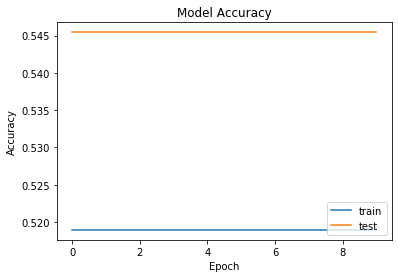

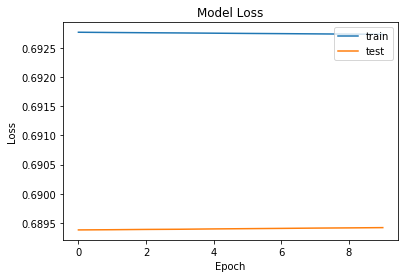

In [36]:
print(history.history.keys())

# Learning curve with respect to accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

# Learning Curve with respect to loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

## 2. Consider the dataset: Stock market data, which include the prices and volumes of various stocks on different trading days. Then, for this dataset, give specific examples of both classification and clustering tasks that can be performed. For each task, state how the data matrix should be constructed (i.e., specify the rows and columns of the matrix)

#### Classification:

Task: We can classify the type of market rising or falling) based on the volume and price of stocks traded on different trading days.

Row: Trading Days

Column: Volume and price of stocks traded

#### Clustering:

Task: Stocks can be clustered into different value return categories based on volume and price of stocks being traded on each day. Essentially the stocks can be clustered into different buying and return correlation levels. 

Row: Trading Days

Column: Volume and price of stocks traded